In [1]:
#libraries
import numpy as np 
import pandas as pd

import random

#preproccesing
from sklearn.metrics import classification_report,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier

# visulization
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

 # Part C

neural network using sklearn

In [2]:
class NeuralNetwork:
    def __init__(self, learning_rate, train,hidden_layers):
        self.train=train
        self.clf=MLPClassifier(solver='lbfgs', alpha=learning_rate,hidden_layer_sizes=hidden_layers, random_state=1)

    def fit(self):
        train_x=self.train[["x","y"]]
        train_y=self.train[["value"]]
        self.clf.fit(train_x,train_y)

    def predict(self, test):
        test_x=test[["x","y"]]
        predicted=self.clf.predict(test_x)
        test['pred']=predicted
        return predicted

    def score(self, test, predicted):
        i=0
        count=0
        for index, row in test.iterrows():
            if row["value"]==predicted[i]:
                count +=1
            i+=1
        return round(count/i, 4)

    def getLastHiddenLayerInfo(self):
        listx=[]
        listy=[]
        val=[]        

        for index, row in self.train.iterrows():
            listx.append(row["x"])
            listy.append(row["y"])
            val.append(row["value"])
        l=[listx,listy]
        for i in range(len(self.clf.coefs_)-1):
            print(self.clf.coefs_[i] ,"\n")
            print(self.clf.intercepts_[i],"\n")
            print(i)
            data=self.train.copy()
            l=(self.lookinlayer1(data,l,self.clf.coefs_[i],self.clf.intercepts_[i]))
        l.append(val)
        return l


    def lookinlayer(self,data,lastlayers,weight,bias):
        count = 0
        rlist=[]
        # for each row we use the activation formula with the weights and bias we returned
        # in the fit function to predict on the test data set
        for k in range(len(bias)):
            pred1 = []
            predictionlist=[]
            for j in range(len(data)):
                prediction=0
                for i in range(len(lastlayers)):
                    prediction =prediction+ bias[k] + (lastlayers[i][j] * weight[i][k])
                predictionlist.append(prediction)
                if prediction > 0:
                    prediction = 1
                else:
                    prediction = -1
                pred1.append(prediction)
        # now add the prediction list to the data set in order to make comparison
            rlist.append(predictionlist)
            data['pred']=pred1
            plotting_test(data)    
        return rlist  
    
    
    
    
    def lookinlayer1(self,data,lastlayers,weight,bias):
        count = 0
        rlist=[]
        # for each row we use the activation formula with the weights and bias we returned
        # in the fit function to predict on the test data set
        for k in range(len(bias)):
            pred1 = []
            predictionlist=[]
            for j in range(len(data)):
                prediction=0
                for i in range(len(lastlayers)):
                    prediction =prediction+ bias[k] + (lastlayers[i][j] * weight[i][k])
                predictionlist.append(prediction)
                if prediction > 0:
                    prediction = 1
                else:
                    prediction = -1
                pred1.append(prediction)
        # now add the prediction list to the data set in order to make comparison
            rlist.append(predictionlist)
            data['pred']=pred1
#             plotting_test(data)    
        return rlist  
        
    def lookin(self,data):
        listx=[]
        listy=[]
        for index, row in data.iterrows():
            listx.append(row["x"])
            listy.append(row["y"])
        l=[listx,listy]
        for i in range(len(self.clf.coefs_)):
            print(self.clf.coefs_[i] ,"\n")
            print(self.clf.intercepts_[i],"\n")
            print(i)
            datac=data.copy()
            l=(self.lookinlayer(datac,l,self.clf.coefs_[i],self.clf.intercepts_[i]))

In [3]:
# this function builds the data set for part A of the assighnment
def build_data_partA(i):
    x = []
    y = []
    value = []
    random.seed(i)
    for i in range(1000):
        # generate two random numbers between -10000 to 10000
        randX = random.randint(-10000, 10000)
        randY = random.randint(-10000, 10000)
        x.append(randX / 100)
        y.append(randY / 100)
        # for part A if y > 1 then the value is 1
        if y[i] > 1:
            value.append(1)
        # else the value is -1
        else:
            value.append(-1)

    # make the data frame
    end = {'x': x, 'y': y, 'value': value}
    df = pd.DataFrame(data=end, columns=['x', 'y', 'value'])
    return df

In [4]:
# this function builds the data set for part B of the assighnment
def build_data_partB(i):
    x = []
    y = []
    value = []
    random.seed(i)
    for i in range(700):
        # generate two random numbers between -10000 to 10000
        randX = random.randint(-10000, 10000)
        randY = random.randint(-10000, 10000)
        x.append(randX / 100)
        y.append(randY / 100)
        # for part A if (4 <= y^2 + x^2 <= 9) then the value is 1
        if 4 <= (y[i] ** 2 + x[i] ** 2) <= 9:
#         if 25<=(y[i]**2+x[i]**2)>=2500:
            value.append(1)
        # else the value is -1
        else:
            value.append(-1)
    for i in range(700,1000):
        # generate two random numbers between -10000 to 10000
        randX = random.randint(-300, 300)
        randY = random.randint(-300, 300)
        x.append(randX / 100)
        y.append(randY / 100)
        # for part A if (4 <= y^2 + x^2 <= 9) then the value is 1
        if 4 <= (y[i] ** 2 + x[i] ** 2) <= 9:
#         if 25<=(y[i]**2+x[i]**2)>=2500:
            value.append(1)
        # else the value is -1
        else:
            value.append(-1)

    # make the data frame
    end = {'x': x, 'y': y, 'value': value}
    df = pd.DataFrame(data=end, columns=['x', 'y', 'value'])
    return df


In [5]:
# this function plots the values of the actual values of the data compared to the prediction values we predicted
def plotting_test(test):
    f, ax = plt.subplots(1, 2)
    ax[0].set_title("value")
    ax[1].set_title("predict")

    for index, row in test.iterrows():
        if row['value'] == 1:
            ax[0].plot(row['x'], row['y'], markersize=2, marker="o", color="blue")
        else:
            ax[0].plot(row['x'], row['y'], markersize=2, marker="o", color="red")
       
        if row['pred'] == 1:
#             if row['value']==1:
             ax[1].plot(row['x'], row['y'], markersize=2, marker="o", color="blue")
#             else:
#                 ax[1].plot(row['x'], row['y'], markersize=2, marker="o", color="yellow")
        else:
#             if row['value']==-1:
            ax[1].plot(row['x'], row['y'], markersize=2, marker="o", color="red")
#             else:
#                 ax[1].plot(row['x'], row['y'], markersize=2, marker="o", color="purple")
    plt.show()

def plotting_train(train):
    for index, row in train.iterrows():
        if row['value'] == 1:
            plt.plot(row['x'], row['y'], markersize=2, marker="o", color="blue")
        else:
            plt.plot(row['x'], row['y'], markersize=2, marker="o", color="red")
    plt.show()

In [6]:
# this function plots the confussion matrix
def confussion_matrix (cf_matrix):
    group_names = ['true pos', 'false pos', 'false neg', 'true neg']
    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [7]:
# def lookin2(test,lastlayers, weight,bias):              
#     count = 0
#     rlist=[]
#     # for each row we use the activation formula with the weights and bias we returned
#     # in the fit function to predict on the test data set
#     for k in range(len(bias)):
#         pred1 = []
#         predictionlist=[]
#         for j in range(len(test)):
#             prediction=0
#             for i in range(len(lastlayers)):
#                 prediction =prediction+ bias[k] + (lastlayers[i][j] * weight[i][k])
#             predictionlist.append(prediction)
#             if prediction > 0:
#                 prediction = 1
#             else:
#                 prediction = -1
#             pred1.append(prediction)
#     # now add the prediction list to the data set in order to make comparison
#         rlist.append(predictionlist)
#         test1=test.copy()
#         test1['pred']=pred1
#         plotting_test(test1)    
#     return rlist  

In [8]:
# def lookin(data, net):
#     listx=[]
#     listy=[]
#     for index, row in data.iterrows():
#         listx.append(row["x"])
#         listy.append(row["y"])
#     l=[listx,listy]
#     for i in range(len(net.clf.coefs_)):
#         datac=data.copy()
#         print(net.clf.coefs_[i] ,"\n")
#         print(net.clf.intercepts_[i],"\n")
#         print(i)
# #         print(datac.head())
# #         print(l)
#         l=(lookin2(datac,l,net.clf.coefs_[i],net.clf.intercepts_[i]))

## part1 main

plotting train


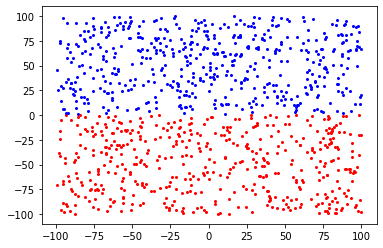

[[-0.92212934 -0.90486696 -0.42130545  0.00799914]
 [ 0.34054503 -0.55213743  0.13596863 -1.36428869]] 

[-0.56470735  1.17015795 -0.2788894   2.17545959] 

0


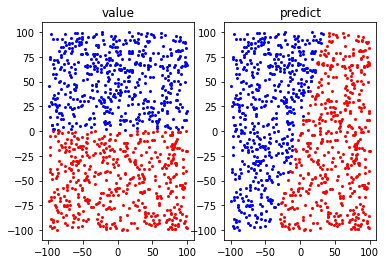

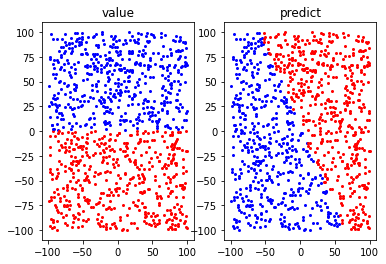

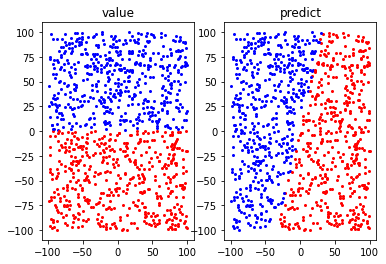

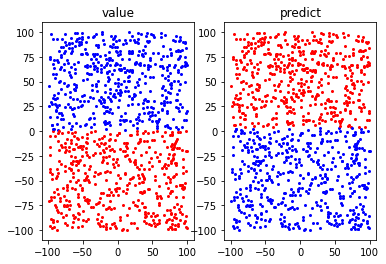

[[-0.02879417  0.31007459]
 [-0.04545546 -0.43007705]
 [ 0.01708001  0.22453557]
 [-0.03503582 -1.67320253]] 

[-1.76557857  4.71483979] 

1


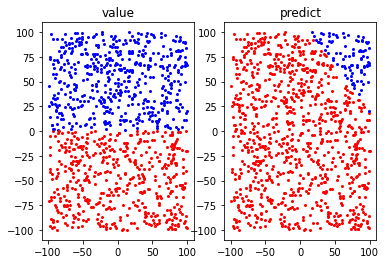

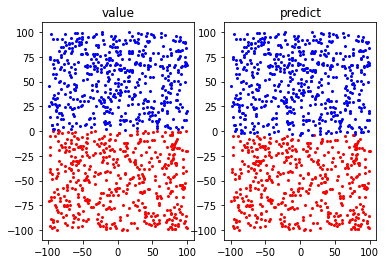

[[-0.55017596]
 [ 2.37912427]] 

[-0.13328276] 

2


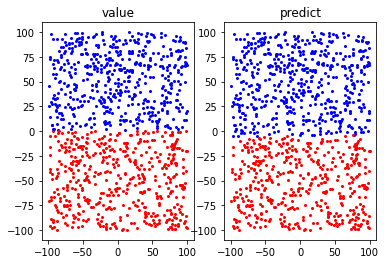

[[2.04193008]] 

[-12.78606745] 

3


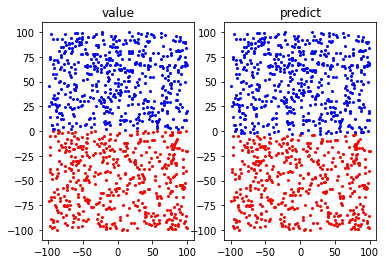

first test
1.0


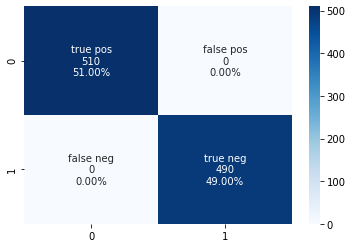

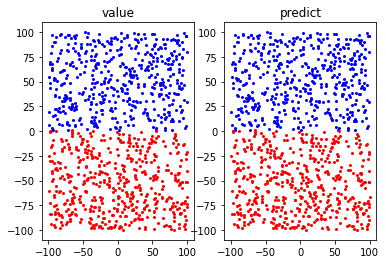

second test
1.0


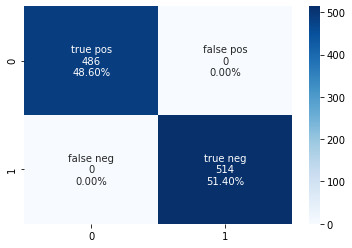

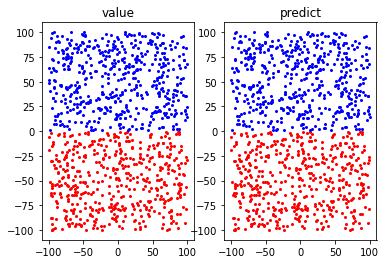

In [9]:
train = build_data_partA(1)
net1=NeuralNetwork(0.1,train,(4,2,1))
net1.fit()
print("plotting train")
plotting_train(train)
net1.lookin(train)

print("first test")
first_test = build_data_partA(9)
test_y=first_test[["value"]]
pred1=net1.predict(first_test)
print(net1.score(first_test,pred1))
con_mat1 = confusion_matrix(pred1,test_y)
confussion_matrix(con_mat1)
plotting_test(first_test)



print("second test")
second_test = build_data_partA(8)
test_y=second_test[["value"]]
pred2=net1.predict(second_test)
print(net1.score(second_test,pred2))
con_mat2 = confusion_matrix(pred2,test_y)
confussion_matrix(con_mat2)
plotting_test(second_test)

[[-0.92212934 -0.90486696 -0.42130545  0.00799914]
 [ 0.34054503 -0.55213743  0.13596863 -1.36428869]] 

[-0.56470735  1.17015795 -0.2788894   2.17545959] 

0


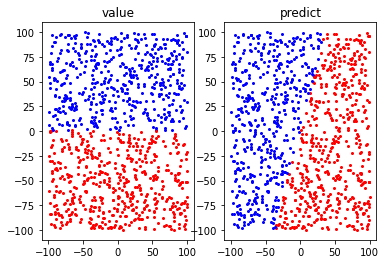

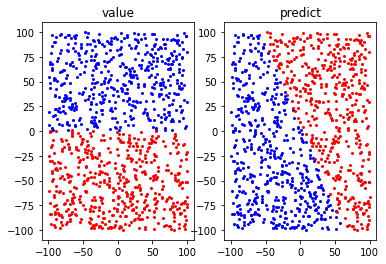

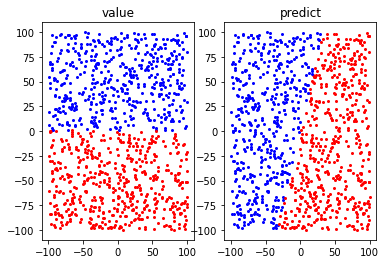

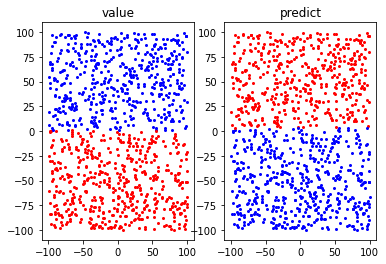

[[-0.02879417  0.31007459]
 [-0.04545546 -0.43007705]
 [ 0.01708001  0.22453557]
 [-0.03503582 -1.67320253]] 

[-1.76557857  4.71483979] 

1


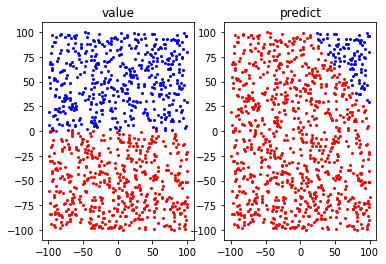

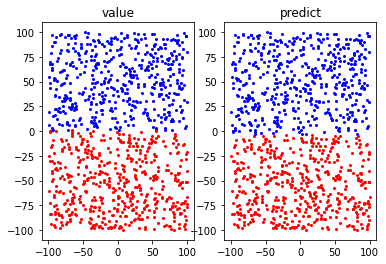

[[-0.55017596]
 [ 2.37912427]] 

[-0.13328276] 

2


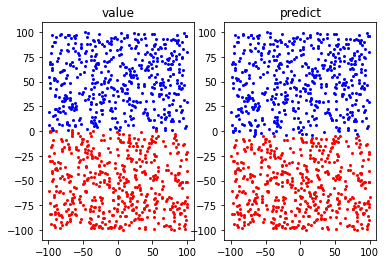

[[2.04193008]] 

[-12.78606745] 

3


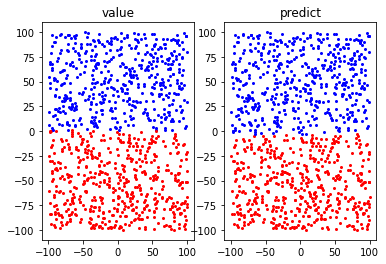

In [10]:
net1.lookin(first_test)

[[-0.92212934 -0.90486696 -0.42130545  0.00799914]
 [ 0.34054503 -0.55213743  0.13596863 -1.36428869]] 

[-0.56470735  1.17015795 -0.2788894   2.17545959] 

0


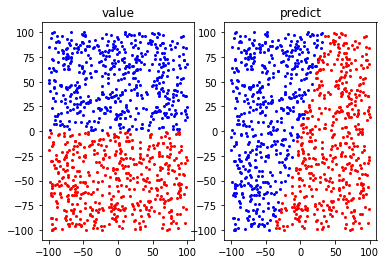

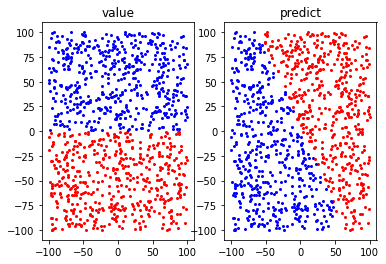

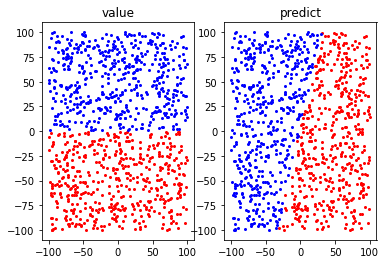

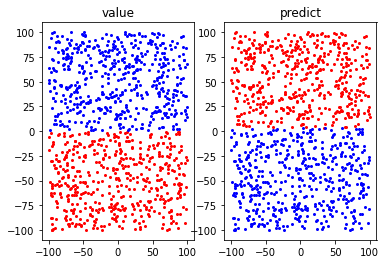

[[-0.02879417  0.31007459]
 [-0.04545546 -0.43007705]
 [ 0.01708001  0.22453557]
 [-0.03503582 -1.67320253]] 

[-1.76557857  4.71483979] 

1


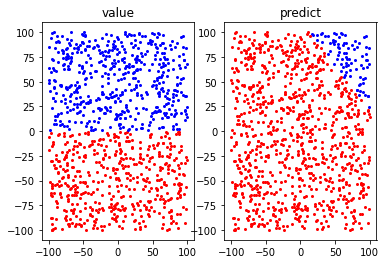

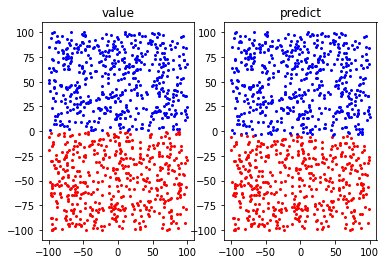

[[-0.55017596]
 [ 2.37912427]] 

[-0.13328276] 

2


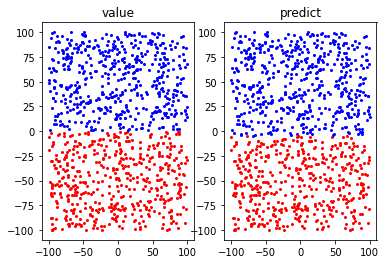

[[2.04193008]] 

[-12.78606745] 

3


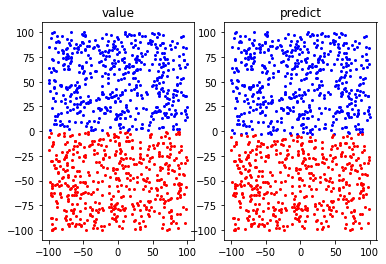

In [11]:
net1.lookin(second_test)

## part2

plotting train


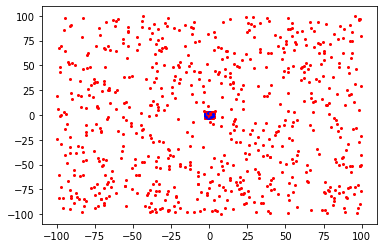

[[ 0.00524609  0.95006888 -0.28650242  0.01472388 -0.60803736]
 [-1.03039636 -0.09150723  0.80247251 -1.33532805 -0.31310867]] 

[ 1.85615512  0.07223519 -1.05821267  3.37426383 -0.6520577 ] 

0


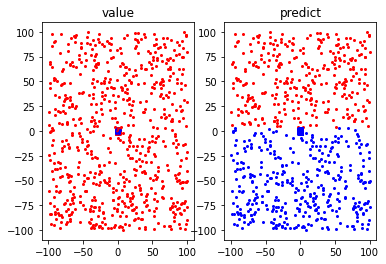

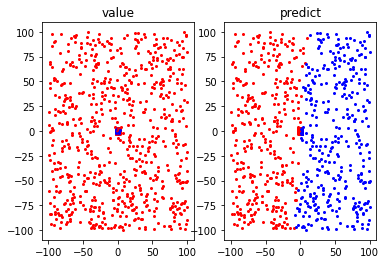

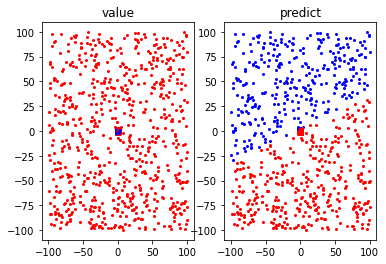

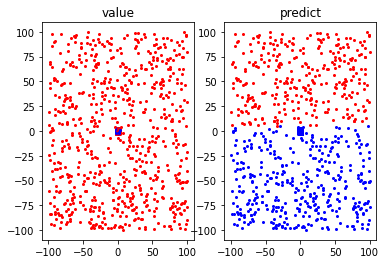

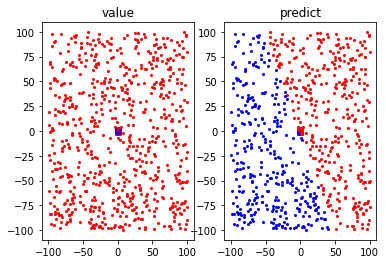

[[ 1.23723214e+00 -1.91080759e-02]
 [-4.64457888e-04 -1.97700930e-01]
 [-8.65858487e-01 -2.75089397e-01]
 [ 1.80892648e+00 -1.05260096e-01]
 [ 4.67945169e-01  1.69323287e-01]] 

[-1.65901446 -0.80346174] 

1


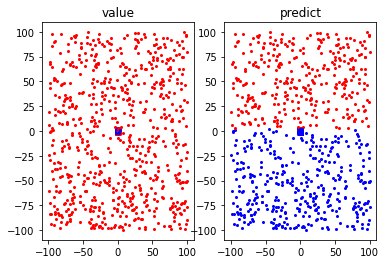

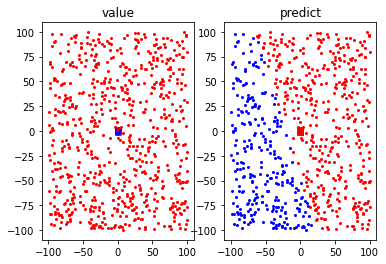

[[-2.34952321]
 [-0.06795172]] 

[10.118629] 

2


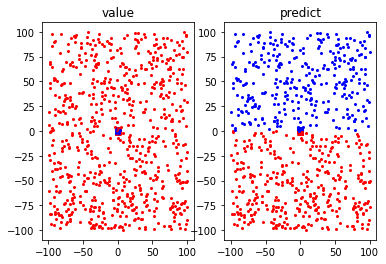

first test
0.498


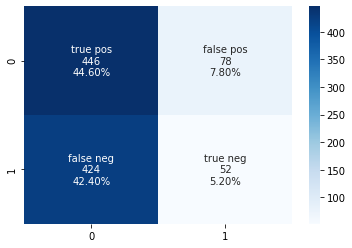

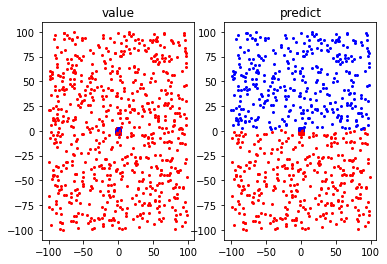

second test
0.54


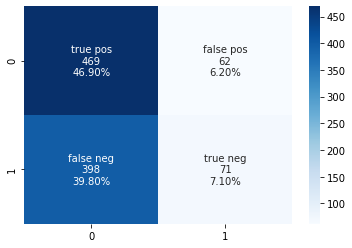

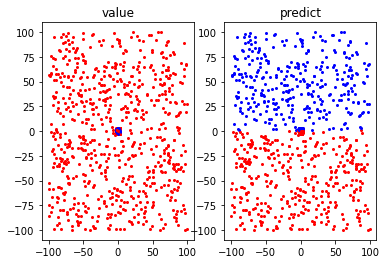

In [12]:
trainb = build_data_partB(9)
net2=NeuralNetwork(0.1,train,(5,2))
net2.fit()
print("plotting train")
plotting_train(trainb)
net2.lookin(trainb)

print("first test")
first_testb = build_data_partB(3)
test_yb=first_testb[["value"]]
pred1=net2.predict(first_testb)
print(net2.score(first_testb,pred1))
con_mat1 = confusion_matrix(pred1,test_yb)
confussion_matrix(con_mat1)
plotting_test(first_testb)



print("second test")
second_testb = build_data_partB(7)
test_yb=second_testb[["value"]]
pred2=net2.predict(second_testb)
print(net2.score(second_testb,pred2))
con_mat2 = confusion_matrix(pred2,test_yb)
confussion_matrix(con_mat2)
plotting_test(second_testb)

[[ 0.00524609  0.95006888 -0.28650242  0.01472388 -0.60803736]
 [-1.03039636 -0.09150723  0.80247251 -1.33532805 -0.31310867]] 

[ 1.85615512  0.07223519 -1.05821267  3.37426383 -0.6520577 ] 

0


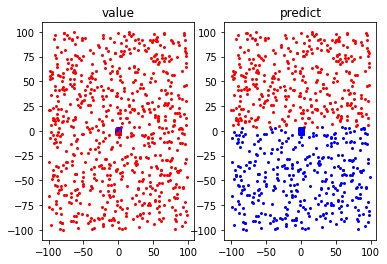

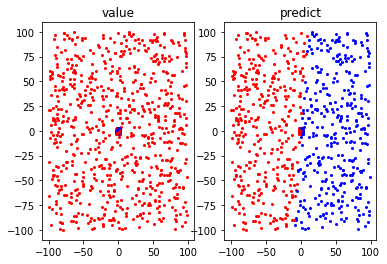

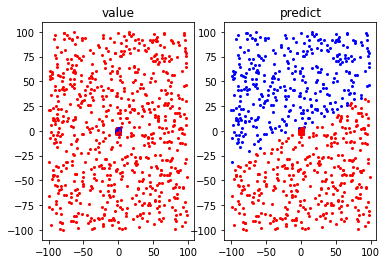

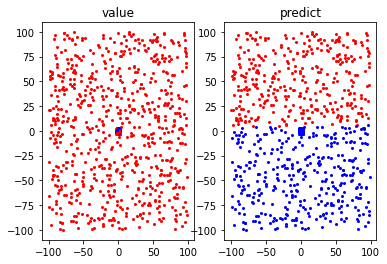

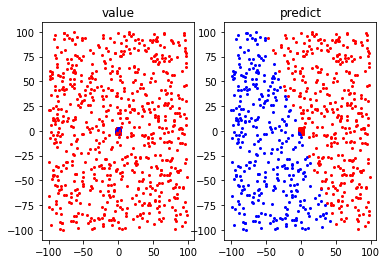

[[ 1.23723214e+00 -1.91080759e-02]
 [-4.64457888e-04 -1.97700930e-01]
 [-8.65858487e-01 -2.75089397e-01]
 [ 1.80892648e+00 -1.05260096e-01]
 [ 4.67945169e-01  1.69323287e-01]] 

[-1.65901446 -0.80346174] 

1


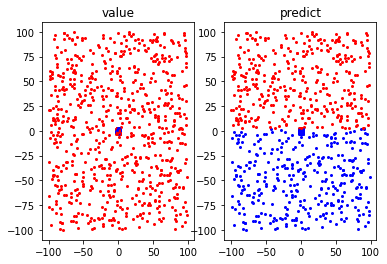

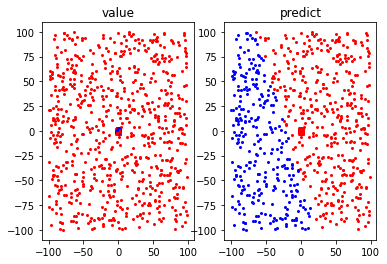

[[-2.34952321]
 [-0.06795172]] 

[10.118629] 

2


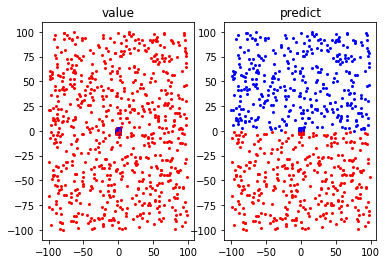

In [13]:
net2.lookin(first_testb)

[[ 0.00524609  0.95006888 -0.28650242  0.01472388 -0.60803736]
 [-1.03039636 -0.09150723  0.80247251 -1.33532805 -0.31310867]] 

[ 1.85615512  0.07223519 -1.05821267  3.37426383 -0.6520577 ] 

0


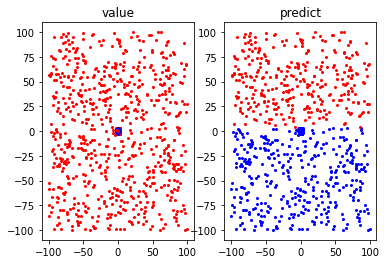

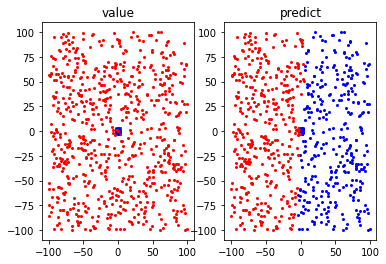

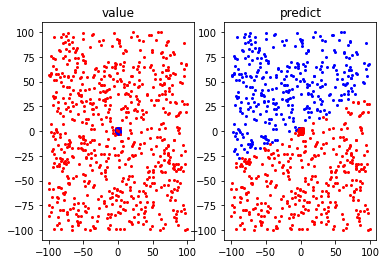

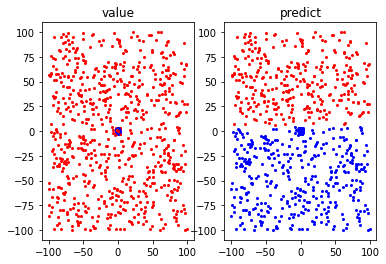

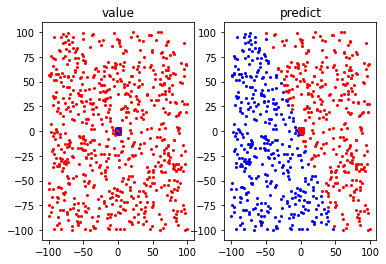

[[ 1.23723214e+00 -1.91080759e-02]
 [-4.64457888e-04 -1.97700930e-01]
 [-8.65858487e-01 -2.75089397e-01]
 [ 1.80892648e+00 -1.05260096e-01]
 [ 4.67945169e-01  1.69323287e-01]] 

[-1.65901446 -0.80346174] 

1


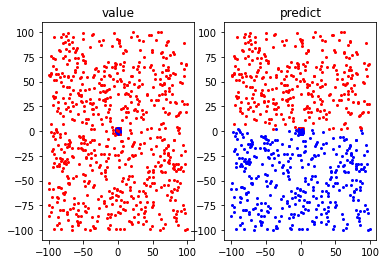

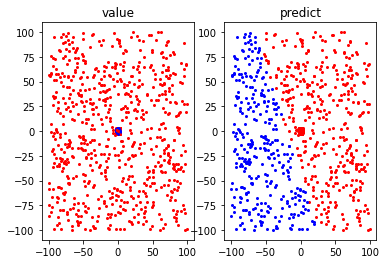

[[-2.34952321]
 [-0.06795172]] 

[10.118629] 

2


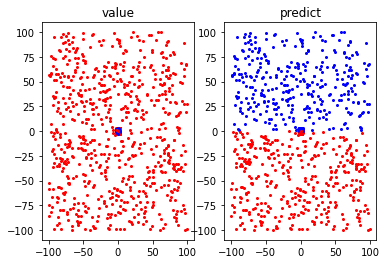

In [14]:
net2.lookin(second_testb)

# part D

In [15]:
listA=net1.getLastHiddenLayerInfo()


[[-0.92212934 -0.90486696 -0.42130545  0.00799914]
 [ 0.34054503 -0.55213743  0.13596863 -1.36428869]] 

[-0.56470735  1.17015795 -0.2788894   2.17545959] 

0
[[-0.02879417  0.31007459]
 [-0.04545546 -0.43007705]
 [ 0.01708001  0.22453557]
 [-0.03503582 -1.67320253]] 

[-1.76557857  4.71483979] 

1
[[-0.55017596]
 [ 2.37912427]] 

[-0.13328276] 

2


In [58]:
print(len(listA))
df=pd.DataFrame()
for i in range(len(listA)):
    if(i<len(listA)-1):
        df[i]=listA[i]
    else:
        df["value"]=listA[i]
df.head(20)

2


,0,value
0,573.863058,1.0
1,-71.882948,-1.0
2,422.224989,1.0
3,369.642278,1.0
4,-169.426604,-1.0
5,406.991410,1.0
6,206.049238,1.0
7,648.254488,1.0
8,320.857356,1.0
9,-129.007112,-1.0


In [69]:
class Adaline:
    def __init__(self, learning_rate, train, num):
        self.learning_rate = learning_rate
        self.train = train
        self.num=num # number of neurons in last layer

    # this function generates random small weights and bias for the Adaline algorithm
    def _weight_genarate(self,num):
        weight = [] 
        for i in range(num):
            random.seed(i)
            rand = random.uniform(0, 0.01)
            rand = round(rand, 4)
            weight.append(rand)
        
        # now generate the bias 
        random.seed(4)
        bias = random.uniform(0, 1)
        bias = round(bias, 4)
        return weight, bias

    # this function fits the adaline model on the training data 
    def fit(self):
        ERR = []
        mse = []
        EPS = 0.001
        # generate weights and bias
        weight, bias = self._weight_genarate(self.num)
        oldmse=1
        while(True):
            ERR = []
            # for each row we fix the bias and wights in order to get the minimum error
            for index, row in self.train.iterrows():
                predicted=bias
                for i in range(self.num):
#                     print("adding")
                    predicted += row[i]/100 * weight[i]
                    
                
                for k in range(len(weight)):
                    # print(k)
                    weight[k]=round((weight[k]+self.learning_rate*row["value"]-predicted*row[k]/100),3)

                bias= round((bias+self.learning_rate*row["value"]-predicted),3)

                # error calculation
                error = (row["value"] - predicted) ** 2
                # if the error is small enough return
                ERR.append(error)
               
            mse.append(np.sum(ERR))
            print(mse[-1])
            if len(mse) >= 2:
                # checking if the error is smaller then eps or if it hasnt changed
                if abs(mse[-1] - mse[-2]) < EPS or abs(mse[-1] - mse[-2])==oldmse :
                    break
            # updating the old mse
            if len(mse)>=2:
                oldmse=abs(mse[-1] - mse[-2])        
        return weight, bias

    
    
    
    
    
    
    
    
    
    # this function predicts on a test data and returns the number of correct predictions
#     def predict(self, test, weight, bias):
#         count = 0
#         pred = []
#         # for each row we use the activation formula with the weights and bias we returned
#         # in the fit function to predict on the test data set
#         for index, row in test.iterrows():
#             prediction = bias + (row['x'] * weight[0]) + (row['y'] * weight[1])
#             if prediction > 0:
#                 prediction = 1
#             else:
#                 prediction = -1
#             pred.append(prediction)

#             if prediction == row['value']:
#                 count += 1
#         # now add the prediction list to the data set in order to make comparison 
#         test['predict'] = pred
#         return count

#     # this function caculates the acuuracy of the predictions
#     def score(self, pred, test):
#         acurr = pred / len(test)
#         res = round(acurr, 4)
#         return res

In [70]:
ada = Adaline(0.1, df, 1)
weight, bias = ada.fit()

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


KeyboardInterrupt: 